In [32]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

In [33]:
data =pd.read_csv(r"C:\Users\bishowa\OneDrive\Desktop\Final project\data\jobs.csv")

In [34]:
data.head()

,Unnamed: 0,Job Salary,Job Experience Required,Key Skills,Role Category,Functional Area,Industry,Job Title
0,0,Not Disclosed by Recruiter,5 - 10 yrs,Media Planning| Digital Media,Advertising,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager
1,1,Not Disclosed by Recruiter,2 - 5 yrs,pre sales| closing| software knowledge| clien...,Retail Sales,"Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer
2,2,Not Disclosed by Recruiter,0 - 1 yrs,Computer science| Fabrication| Quality check|...,R&D,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive
3,3,"2,00,000 - 4,00,000 PA.",0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer
4,4,Not Disclosed by Recruiter,2 - 5 yrs,manual testing| test engineering| test cases|...,Programming & Design,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer


In [35]:
data = data.drop("Unnamed: 0",axis=1)

In [36]:
data.isnull().sum()

Job Salary                 0
Job Experience Required    0
Key Skills                 0
Role Category              0
Functional Area            0
Industry                   0
Job Title                  0
dtype: int64

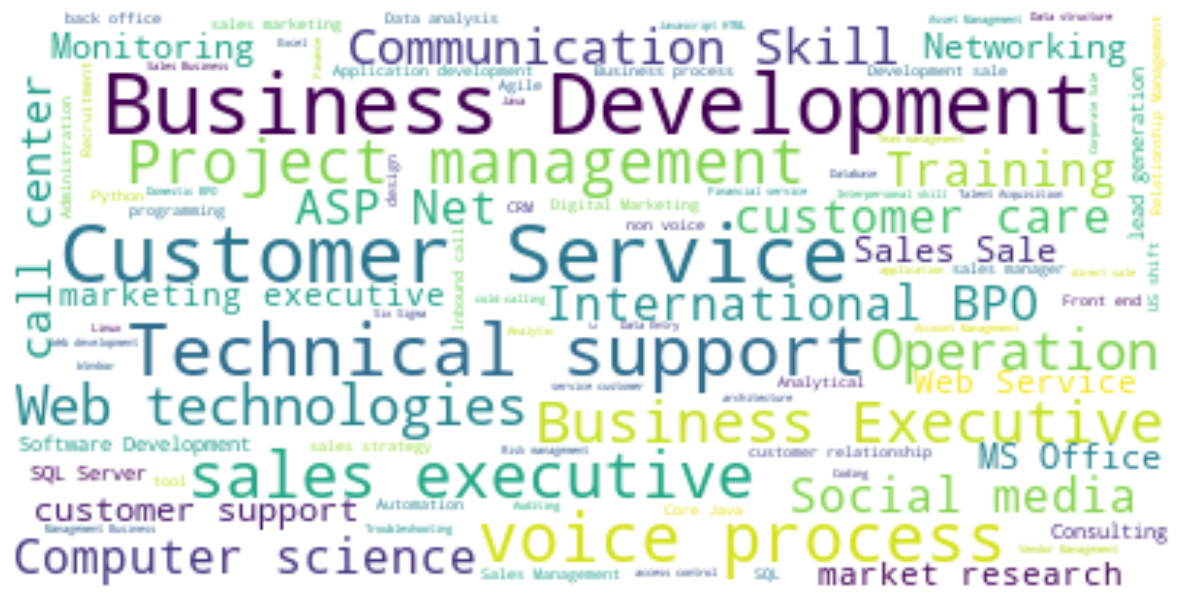

In [37]:
text = " ".join(i for i in data["Key Skills"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

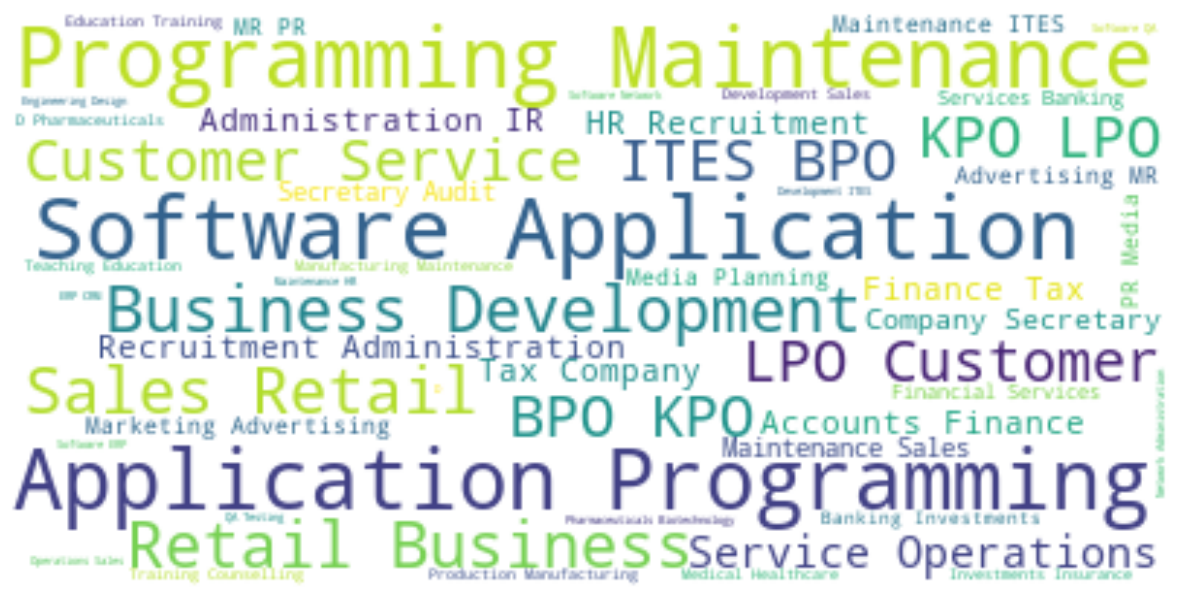

In [38]:
text = " ".join(i for i in data["Functional Area"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

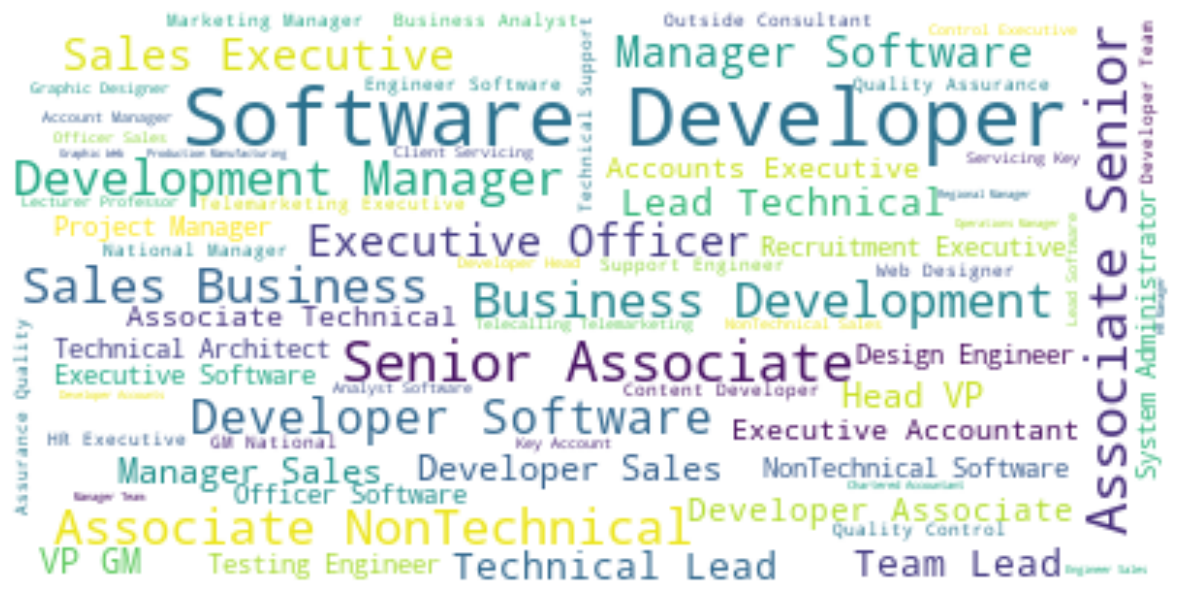

In [39]:
text = " ".join(i for i in data["Job Title"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [40]:
# from sklearn.feature_extraction import text
# feature = data["Key Skills"].to_list()
# print(feature[:10])
# stopwords.add("|")
# tfidf = text.TfidfVectorizer(input=feature, stop_words=stopwords)
# print(tfidf)
# tfidf_matrix = tfidf.fit_transform(feature)
# similarity = cosine_similarity(tfidf_matrix)

In [41]:
import pandas as pd
from sklearn.feature_extraction import text
from sklearn.metrics.pairwise import cosine_similarity

# # Assuming data is a pandas DataFrame
# data = pd.DataFrame({
#     "Key Skills": ["Python|Machine Learning|Data Analysis", "SQL|Data Mining|R", "Communication|Leadership", "", None]
# })

# Convert to list and ensure all entries are strings, remove empty strings and None values
feature = [str(skill) for skill in data["Key Skills"].dropna() if str(skill).strip()]
print(feature[:10])

# Define stopwords and add "|"
stopwords = text.ENGLISH_STOP_WORDS
stopwords = list(stopwords.union({"|"}))  # Convert frozenset to list

# Initialize TfidfVectorizer correctly
tfidf = text.TfidfVectorizer(stop_words=stopwords)

# Fit and transform the feature list
tfidf_matrix = tfidf.fit_transform(feature)

# Calculate cosine similarity
similarity = cosine_similarity(tfidf_matrix)

print(similarity)


[' Media Planning| Digital Media', ' pre sales| closing| software knowledge| clients| requirements| negotiating| client| online bidding| good communication| technology', ' Computer science| Fabrication| Quality check| Intellectual property| Electronics| Support services| Research| Management| Human resource management| Research Executive', ' Technical Support', ' manual testing| test engineering| test cases| web testing| web technologies', ' adobe experience manager| digital| digital marketing| adobe analytics| data analytics| aem| adobe| sitecatalyst', ' channel partners| real estate| negotiation| property| Residential Sales', ' TFS| Azure| Git| VSTS| Docker| DynaTrace| Splunk| AWS', ' Bde', ' technical support| support services| application support| communication skills| voice based process| semi voice| semi voice process']


MemoryError: Unable to allocate 5.44 GiB for an array with shape (27010, 27010) and data type float64

In [ ]:
indices = pd.Series(data.index, index=data['Job Title']).drop_duplicates()

In [ ]:
def jobs_recommendation(Title, similarity = similarity):
    index = indices[Title]
    similarity_scores = list(enumerate(similarity[index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[::], reverse=True)
    similarity_scores = similarity_scores[0:5]
    newsindices = [i[0] for i in similarity_scores]
    return data[['Job Title', 'Job Experience Required', 
                 'Key Skills']].iloc[newsindices]

print(jobs_recommendation("Software Developer"))

                                       Job Title Job Experience Required  \
6249          Sales/Business Development Manager               4 - 5 yrs   
6248                          Software Developer               2 - 5 yrs   
6247  Associate/Senior Associate -(NonTechnical)              5 - 10 yrs   
6246                          Software Developer               1 - 6 yrs   
6245  Associate/Senior Associate -(NonTechnical)               1 - 4 yrs   

                                             Key Skills  
6249   Networking| Printing| Aerospace| Raw material...  
6248   PHP| MVC| Laravel| AWS| SDLC| Wordpress| LAMP...  
6247   Data analysis| Investment banking| Financial ...  
6246   Coding| Wordpress| Commerce| HTML| Troublesho...  
6245   client servicing| client support| background ...  


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer

# Load the jobs.csv file
jobs_df = pd.read_csv(r"C:\Users\bishowa\OneDrive\Desktop\Final project\data\jobs.csv")

# Drop the unnamed column if it exists
if 'Unnamed: 0' in jobs_df.columns:
    jobs_df = jobs_df.drop(columns=['Unnamed: 0'])

# Preprocess 'Job Salary' and 'Job Experience Required' columns
def preprocess_salary(salary):
    if pd.isna(salary) or 'Not Disclosed' in salary:
        return np.nan
    salary = re.findall(r'\d+', salary.replace(',', ''))
    if not salary:
        return np.nan
    return (int(salary[0]) + int(salary[-1])) / 2  # Use average of the range

def preprocess_experience(exp):
    if pd.isna(exp):
        return np.nan
    exp = re.findall(r'\d+', exp)
    if not exp:
        return np.nan
    return (int(exp[0]) + int(exp[-1])) / 2  # Use average of the range

jobs_df['Job Salary'] = jobs_df['Job Salary'].apply(preprocess_salary)
jobs_df['Job Experience Required'] = jobs_df['Job Experience Required'].apply(preprocess_experience)

# Preprocess 'Key Skills' column
jobs_df['Key Skills'] = jobs_df['Key Skills'].fillna('')

# Use CountVectorizer to convert 'Key Skills' to a numeric format
vectorizer = CountVectorizer(tokenizer=lambda x: x.split('|'))
key_skills_matrix = vectorizer.fit_transform(jobs_df['Key Skills'])
key_skills_df = pd.DataFrame(key_skills_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Concatenate the key skills DataFrame with the original DataFrame
encoded_df = pd.concat([jobs_df.drop(columns=['Key Skills']), key_skills_df], axis=1)

# Encode other categorical features using one-hot encoding
encoded_df = pd.get_dummies(encoded_df, columns=['Role Category', 'Functional Area', 'Industry', 'Job Title'])

# Calculate the correlation matrix
correlation_matrix = encoded_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Job Features')
plt.show()

# Extract top correlated features
def get_top_correlations(corr_matrix, threshold=0.7):
    corr_pairs = corr_matrix.unstack()
    high_corr = corr_pairs[(corr_pairs > threshold) & (corr_pairs < 1)]
    return high_corr.sort_values(ascending=False)

# Get the top correlated features
top_correlations = get_top_correlations(correlation_matrix)

# Print the top correlated features
print("Top Correlated Features:")
print(top_correlations)


c:\Users\bishowa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


MemoryError: Unable to allocate 3.60 GiB for an array with shape (17889, 27010) and data type int64